In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 

In [2]:
data = pd.read_csv("winequality-red.csv")

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
x = data.drop(columns = "quality")

In [5]:
y = data["quality"]


In [6]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [7]:
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [8]:
x_norm=(x-x.mean())/x.std()
x_norm

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946
1,-0.298454,1.966827,-1.391037,0.043403,0.223805,0.872365,0.624168,0.028252,-0.719708,0.128910,-0.584594
2,-0.298454,1.296660,-1.185699,-0.169374,0.096323,-0.083643,0.228975,0.134222,-0.331073,-0.048074,-0.584594
3,1.654339,-1.384011,1.483689,-0.453077,-0.264878,0.107558,0.411372,0.664069,-0.978798,-0.461036,-0.584594
4,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946
...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217415,0.403103,-0.980362,-0.382151,0.053829,1.541571,-0.075020,-0.978459,0.899605,-0.461036,0.072271
1595,-1.389721,0.123866,-0.877693,-0.240300,-0.541090,2.210777,0.137777,-0.861893,1.353012,0.600867,0.729136
1596,-1.159980,-0.099523,-0.723690,-0.169374,-0.243630,1.254769,-0.196617,-0.533387,0.705287,0.541872,0.541460
1597,-1.389721,0.654416,-0.775024,-0.382151,-0.264878,1.541571,-0.075020,-0.676446,1.676875,0.305894,-0.209243


In [9]:
y_norm = (y-y.mean())/y.std()
y_norm

0      -0.787576
1      -0.787576
2      -0.787576
3       0.450707
4      -0.787576
          ...   
1594   -0.787576
1595    0.450707
1596    0.450707
1597   -0.787576
1598    0.450707
Name: quality, Length: 1599, dtype: float64

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x_norm,y_norm,test_size=0.3,random_state=69)

In [11]:
def CostFunction(x,y,w,b):
    cost = np.sum((((x.dot(w) + b) - y) ** 2) / (2*len(y)))
    return cost

def GradientDescent(x, y, w, b, learning_rate, epochs):
    cost_list = [0] * epochs
   
    for epoch in range(epochs):
        z = x.dot(w) + b
        loss = z - y
        
        weight_gradient = x.T.dot(loss) / len(y)
        bias_gradient = np.sum(loss) / len(y)
        
        w = w - learning_rate*weight_gradient
        b = b - learning_rate*bias_gradient
  
        cost = CostFunction(x, y, w, b)
        cost_list[epoch] = cost
        
        if (epoch%(epochs/10)==0):
            print("Cost is:",cost)
    return w, b, cost_list

        

In [12]:
w, b, c= GradientDescent(x_train, y_train, np.zeros(x_train.shape[1]), 0, 0.1,epochs=100)

Cost is: 0.42331790784957424
Cost is: 0.31440352324083054
Cost is: 0.3086246261148787
Cost is: 0.3072274373500218
Cost is: 0.30661553731976793
Cost is: 0.30630853421322335
Cost is: 0.3061425282806807
Cost is: 0.30604664444085034
Cost is: 0.30598756625453816
Cost is: 0.30594879281551


In [13]:
w

fixed acidity           0.055747
volatile acidity       -0.223821
citric acid            -0.041998
residual sugar          0.040429
chlorides              -0.098620
free sulfur dioxide     0.049532
total sulfur dioxide   -0.144655
density                -0.073239
pH                     -0.074659
sulphates               0.202185
alcohol                 0.326635
dtype: float64

In [14]:
b

-0.019377122508892064

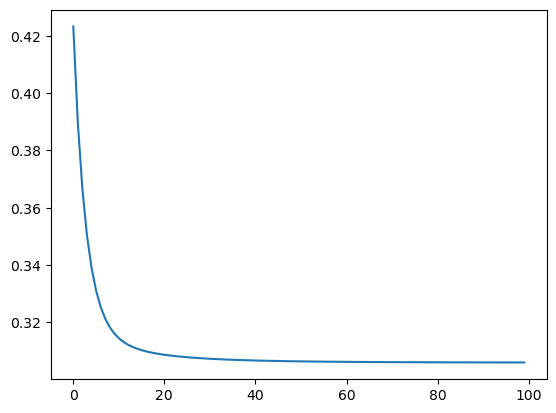

In [15]:
plt.plot(c)

In [16]:
def predict(X, w, b):
    return X.dot(w) + b
y_pred = predict(x_test, w, b)

In [17]:
y_pred

1018    1.138191
711    -0.840233
493    -0.077433
264     0.494628
725    -0.169159
          ...   
678    -0.747829
1146   -0.008581
668     0.019419
68      0.442543
363     0.492463
Length: 480, dtype: float64

In [18]:
y_test

1018    0.450707
711    -0.787576
493     0.450707
264    -0.787576
725    -0.787576
          ...   
678    -0.787576
1146    0.450707
668    -0.787576
68     -0.787576
363    -0.787576
Name: quality, Length: 480, dtype: float64

In [19]:
y_test.mean()

0.043105666892836535

In [20]:
def r2score(Y_pred, Y):
    rss = np.sum((Y_pred - Y) ** 2)
    tss = np.sum((Y-Y.mean()) ** 2)
    
    r2 = 1 - (rss / tss)
    return r2
r2score(y_pred, y_test)

0.3695365356881374

In [21]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred, )

0.3695365356881374

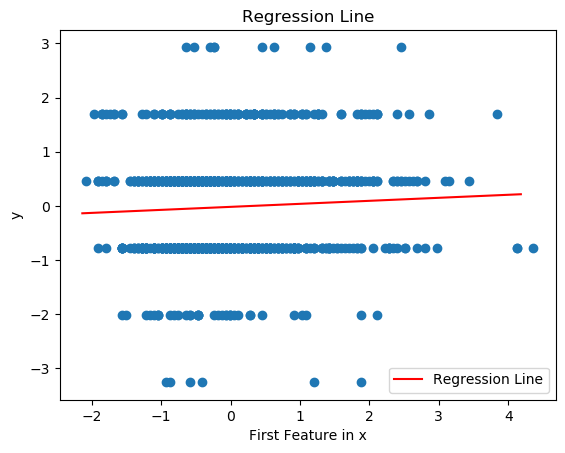

In [22]:
x_values = np.linspace(np.min(x_test.iloc[:,0]),np.max(x_test.iloc[:,0]), 100)
y_values = b+ w[0]*x_values

plt.scatter(x_train.iloc[:,0],y_train)
plt.plot(x_values, y_values, color='r', label='Regression Line')
plt.xlabel('First Feature in x')
plt.ylabel('y')
plt.title('Regression Line')
plt.legend()
plt.show()

In [23]:
print("Accuracy of the model is",r2score(y_pred,y_test)*100,"%.")

Accuracy of the model is 36.953653568813735 %.
